In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
bp_df = pd.read_csv('D:\\Downloads\\bp_raw.csv')

In [14]:
# Create list of unique meds, sorted in chron order
chron_meds = []
for med in bp_df.Medication.values:
    if med not in chron_meds:
        chron_meds.append(med)

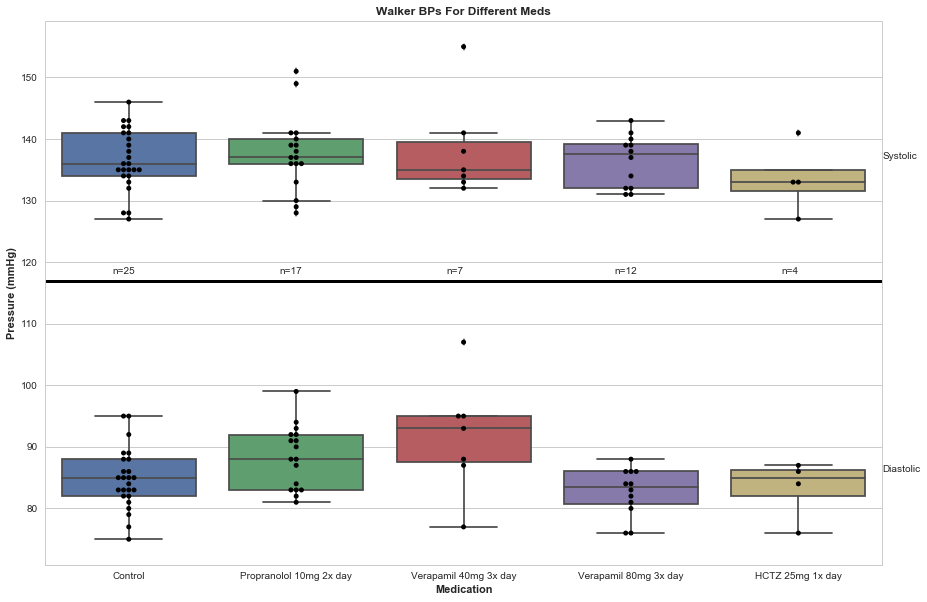

In [15]:
# Create plot
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
# Systolic
sns.swarmplot(x='Medication', y='Systolic (mmHg)', data=bp_df, color='k')
sns.boxplot(x='Medication', y='Systolic (mmHg)', data=bp_df)
# Diastolic
sns.swarmplot(x='Medication', y='Diastolic (mmHg)', data=bp_df, color='k')
sns.boxplot(x='Medication', y='Diastolic (mmHg)', data=bp_df)

# Axis labels & title
plt.ylabel('Pressure (mmHg)', fontweight='bold')
plt.xlabel('Medication', fontweight='bold')
plt.title("Walker BPs For Different Meds", fontweight='bold')

# Find plot xlims
ax = plt.gca()
xmin, xmax = ax.get_xlim()

# Put systolic/diastolic labels at global average of type
sys_mean = np.nanmean(bp_df['Systolic (mmHg)'].values)
dia_mean = np.nanmean(bp_df['Diastolic (mmHg)'].values)
plt.text(xmax, sys_mean, 'Systolic')
plt.text(xmax, dia_mean, 'Diastolic')

# Put horiz line at midpoint between lowest systole and highest diastole
mid_pt = np.mean([np.nanmin(bp_df['Systolic (mmHg)'].values),
                  np.nanmax(bp_df['Diastolic (mmHg)'].values)])
plt.hlines(mid_pt, xmin, xmax, linewidth=3)

# Annotate with number of samples for each medication
# positioner is found by trial/error
positioner = -0.1
for med in chron_meds:
    count = len(bp_df[bp_df['Medication'] == med])
    plt.text(positioner, mid_pt+1, 'n={0}'.format(count))
    positioner += 1